#  Insurance Premium Prediction


![](https://img.freepik.com/free-vector/emergency-support-fund-abstract-concept_335657-3060.jpg?w=740&t=st=1676823326~exp=1676823926~hmac=208d30f8fcafb7c896a3d56f02c287ef9c7515cc7533be2e18625702efb202f8)

## Problem Statement


**QUESTION** :As the lead data scientist at ACME Insurance Inc., your objective is to develop an automated system that can estimate the annual medical expenses of new customers based on various input data, such as age, sex, BMI, number of children, smoking habits, and residential region. The estimates generated by this system will be used to determine the insurance premium offered to each customer on a yearly basis. Additionally, a dataset with verified historical information for over 1300 customers, which includes their medical expenses and the aforementioned input data, has been provided for use.
The dataset was sourced from Kaggle. Dataset source: [Kaggle](https://www.kaggle.com/noordeen/insurance-premium-prediction)

### Importing important Libraries

In [560]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython import display
import scipy as sp
import warnings
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from time import time
import os



### Loading Data into Pandas dataframe

In [561]:
df=pd.read_csv("D:\DS Projects\insurance\insurance.csv")

In [562]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [563]:
df.shape

(1338, 7)

There are 1338 rows and 7 feature

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [565]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


The numerical columns in the dataset appear to have reasonable ranges of values, without any negative values in age or other fields. As a result, there may not be a significant need for data cleaning or correction. However, the "expenses" column appears to be significantly skewed, as the maximum value is much higher than the median (50th percentile) value.
> 1. There appears to be a significant difference between the 75th percentile and maximum expenses in the numerical column, suggesting the presence of outliers.
> 2. The numerical column for BMI also shows a difference between the 75th percentile and the maximum BMI value.
> 3. Around 50 percent of the customers in the dataset have a single child.

In [566]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

From above we can see that there are no missing value in the dataset.

In [567]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [568]:
df1=df

In [569]:
df1['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [570]:
df1.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Age

<AxesSubplot:title={'center':'Distribution Of Age'}, xlabel='age', ylabel='Count'>

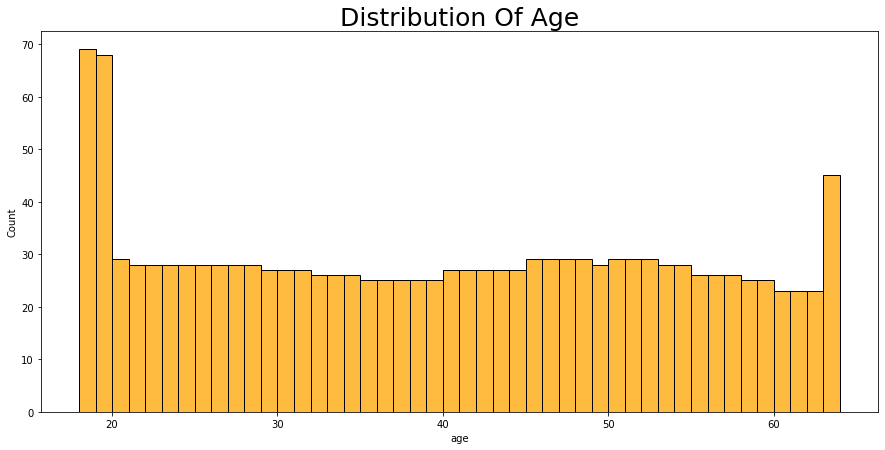

In [571]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of Age",fontsize=25)
sns.histplot(x='age',data=df1,bins=46,color='orange')

The distribution of age seems to be normal 

# BMI

Text(0, 0.5, 'Frequency')

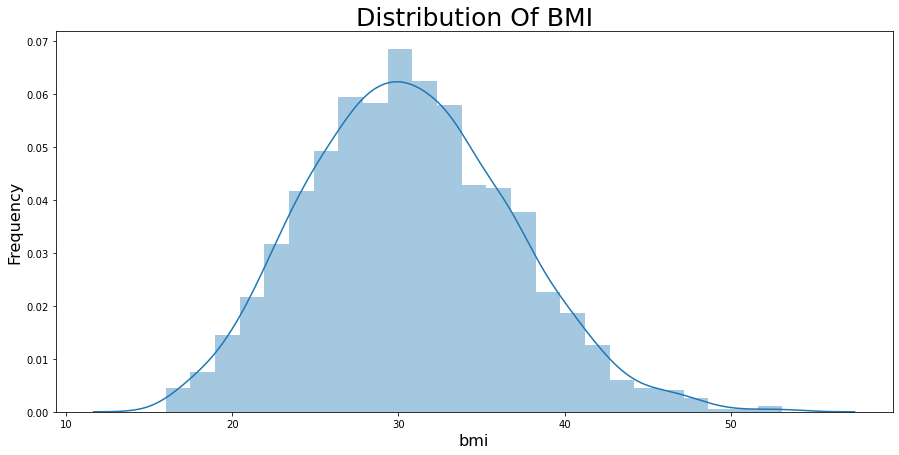

In [572]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of BMI",fontsize=25)
g=sns.distplot(df1['bmi'])
g.set_xlabel("bmi", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

<AxesSubplot:xlabel='bmi'>

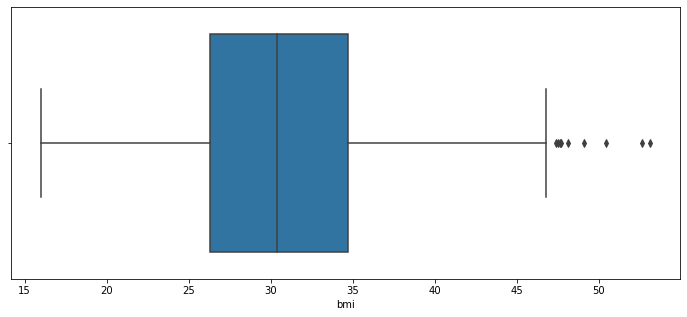

In [573]:
plt.figure(figsize=(12,5))
sns.boxplot(x='bmi',data=df1)

The distribution of BMI seems to be a normal distribution as we can see from above distplot.From boxplot it looks like there are few outliers there.

### Expenses

<AxesSubplot:xlabel='expenses', ylabel='Count'>

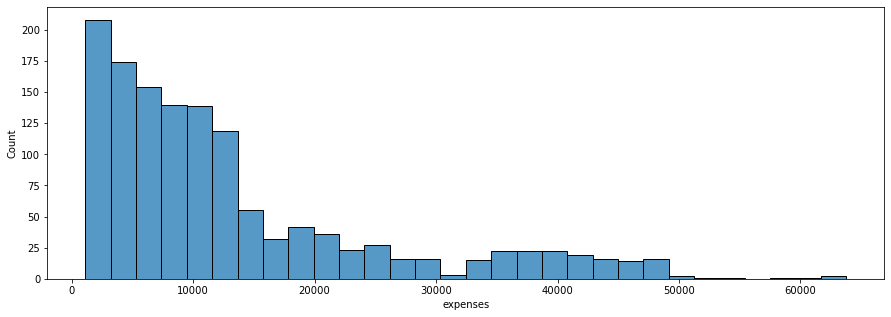

In [574]:
plt.figure(figsize=(15,5))
sns.histplot(x='expenses',data=df1)


### Distribution of Expenses with respect to Age of the customers

In [575]:
fig = px.histogram(df1,
                    x='age',
                    y='expenses',
                    color_discrete_sequence=['green'],
                    title="Annual Medical Expenses")

fig.update_layout(bargap=0.1)
fig.show()  

### Expenses based on Smoking Habbit of customers

<AxesSubplot:xlabel='smoker', ylabel='count'>

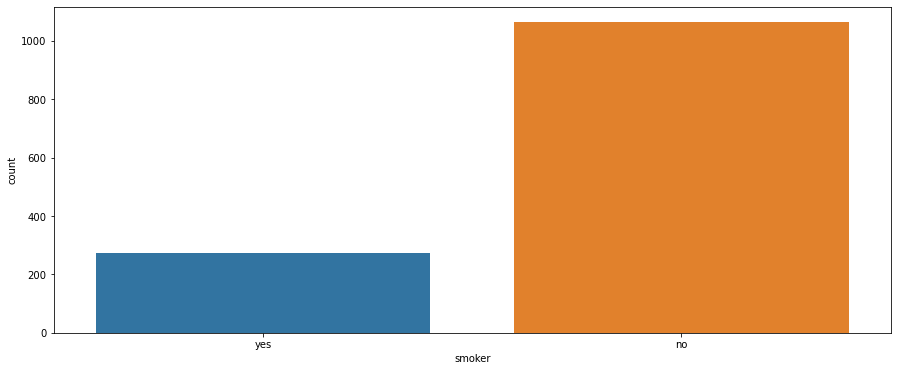

In [576]:
plt.figure(figsize=(15,6))
sns.countplot(x='smoker',data=df1)

smokers are less as compared to non smokers.

In [577]:
fig = px.histogram(df1,
                    x='expenses',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['red', 'green'],
                    title="Annual Medical Expenses")

fig.update_layout(bargap=0.1)
fig.show()  

From above barplot we conclude that smokers has more expenses then non smokers.

### No. Of Children Vs Expenses

<AxesSubplot:xlabel='children', ylabel='expenses'>

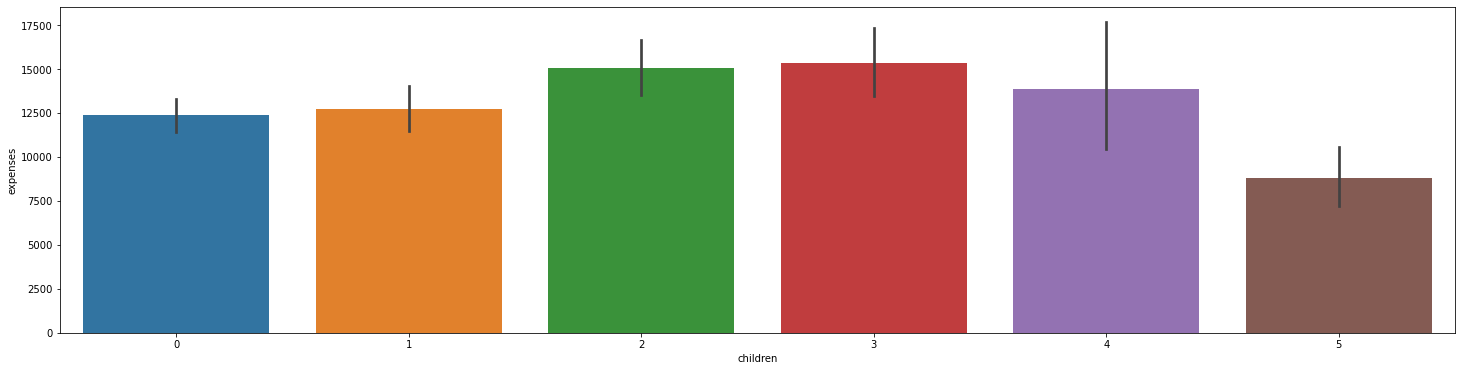

In [578]:
plt.figure(figsize=(25,6))
sns.barplot(x='children',y='expenses',data=df1)


### Region Vs Expenses

<AxesSubplot:xlabel='region', ylabel='expenses'>

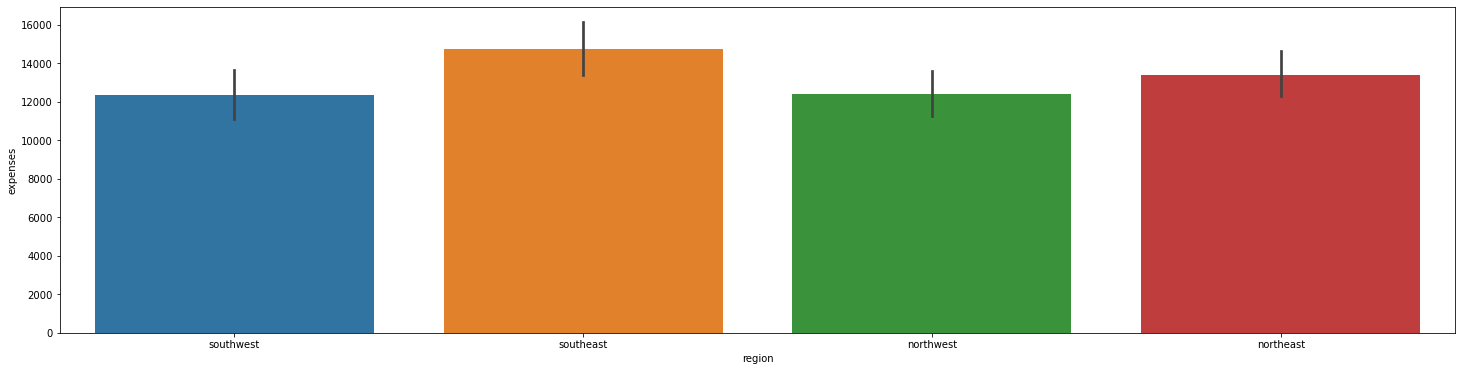

In [579]:
plt.figure(figsize=(25,6))
sns.barplot(x='region',y='expenses',data=df1)

### Smokers vs Expenses

In [580]:
fig = px.violin(df1, y="expenses", x= "smoker")
fig.show()

Expenses of smokers are more as compared to non smokers

<AxesSubplot:xlabel='smoker', ylabel='count'>

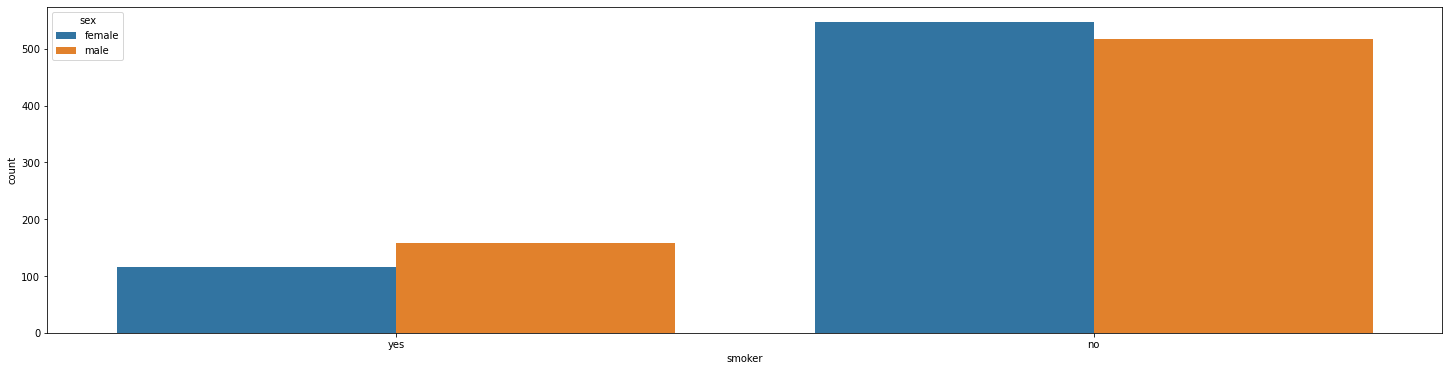

In [581]:
plt.figure(figsize=(25,6))
sns.countplot(x=df1.smoker,hue=df1.sex)

From above countplot we conclude that no of smoker are more in male category.

## Multivariate Analyses

In [582]:
fig = px.scatter(df1, x="bmi", y="expenses", color="sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [583]:
fig = px.scatter(df1, x="bmi", y="expenses", color="smoker", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [584]:
fig = px.scatter(df1,
                x="age",
                y="expenses",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs Expenses")

fig.update_traces(marker_size=5)
fig.show()   

### Analyzing data using Regression Plot

1. Age Vs Expenses

<AxesSubplot:xlabel='age', ylabel='expenses'>

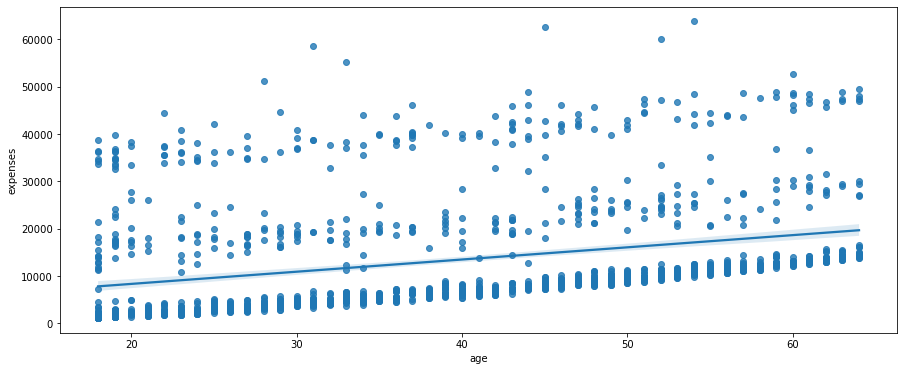

In [585]:
plt.figure(figsize=(15,6))
sns.regplot(x='age',y='expenses',data=df1)

From above regression polot we conclude that expenses rises with age.

2. BMI vs expenses

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

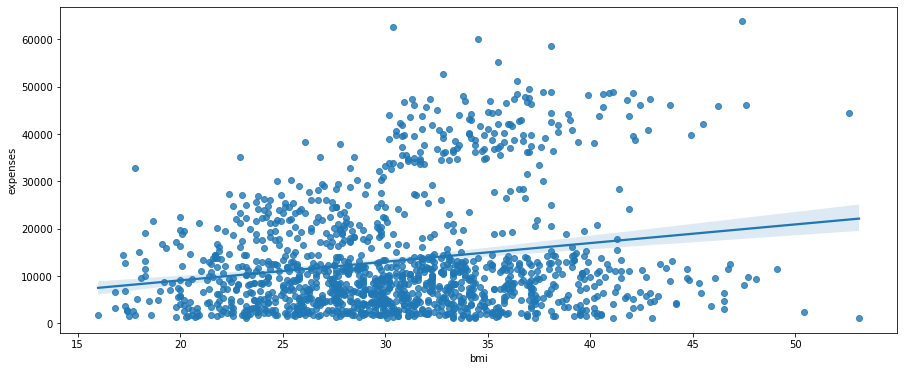

In [586]:
plt.figure(figsize=(15,6))
sns.regplot(x='bmi',y='expenses',data=df1)

3. Smokers Vs Expenses

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

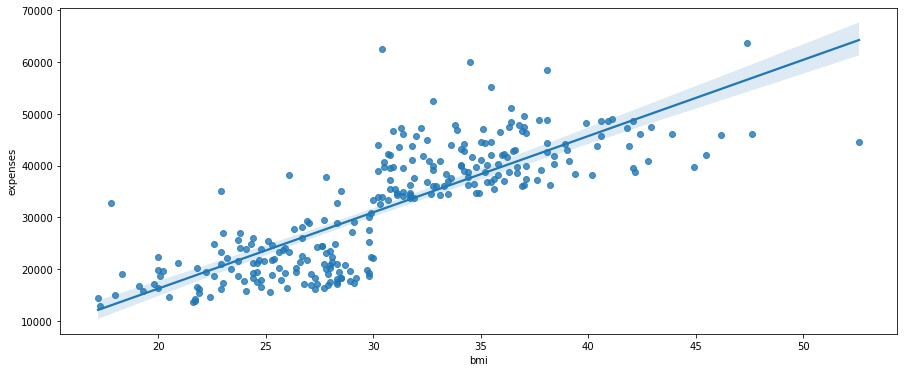

In [587]:
#smokers bmi vs expenses
plt.figure(figsize=(15,6))
smokers_bmi=df1[df1['smoker']=='yes']
sns.regplot(x='bmi',y='expenses',data=smokers_bmi)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

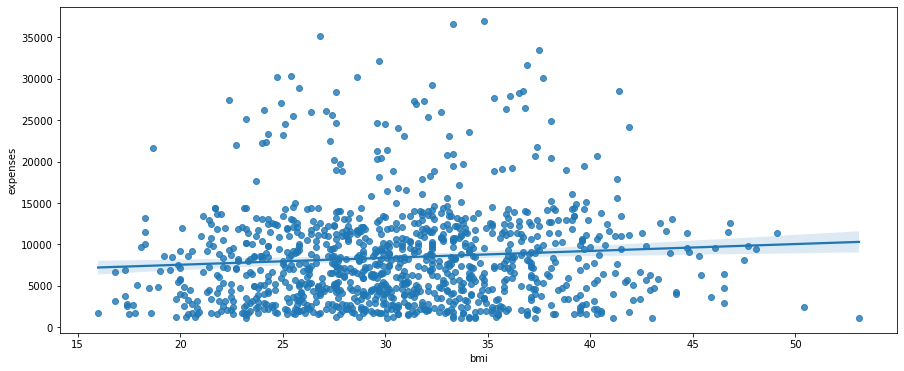

In [588]:
#non smokers bmi vs expenses
plt.figure(figsize=(15,6))
non_smokers_bmi=df1[df1['smoker']=='no']
sns.regplot(x='bmi',y='expenses',data=non_smokers_bmi)


expenses increases with respect to bmi if the person is smoker

### Encoding the categorical Data


In [589]:
isSmoker=(df1['smoker']=='yes')
notsmoker=(df1['smoker']=='no')


In [590]:
df1.loc[isSmoker,'smoker']=1
df1.loc[notsmoker,'smoker']=0

In [591]:
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86


In [592]:
SEregion=(df1['region']=='southeast')
SWregion=(df1['region']=='southwest')
NWregion=(df1['region']=='northwest')
NEregion=(df1['region']=='northeast')


In [593]:
df1.loc[SEregion,'region']=1
df1.loc[SWregion,'region']=2
df1.loc[NWregion,'region']=3
df1.loc[NEregion,'region']=4

In [594]:
men=(df1['sex']=='male')
women=(df1['sex']=='female')


In [595]:
df1.loc[men,'sex']=1
df1.loc[women,'sex']=0

In [596]:
convert_dict={'sex':float,'smoker':float,'region':float}

In [597]:
df1=df1.astype(convert_dict)

### Corelation

In [598]:
df1.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.012816,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


In [599]:
cor=df1.corr()

<AxesSubplot:>

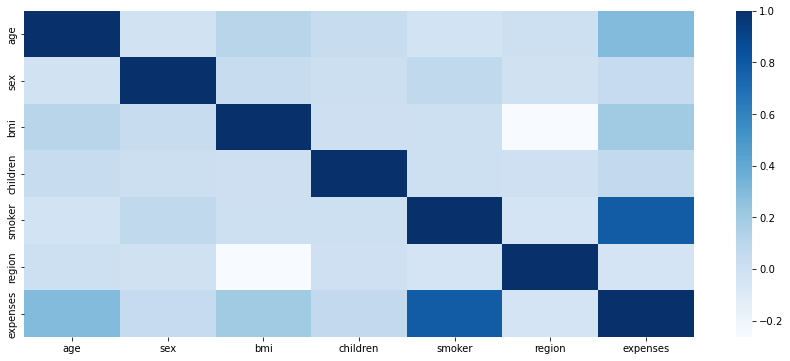

In [600]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,fmt='.1g',cmap='Blues')


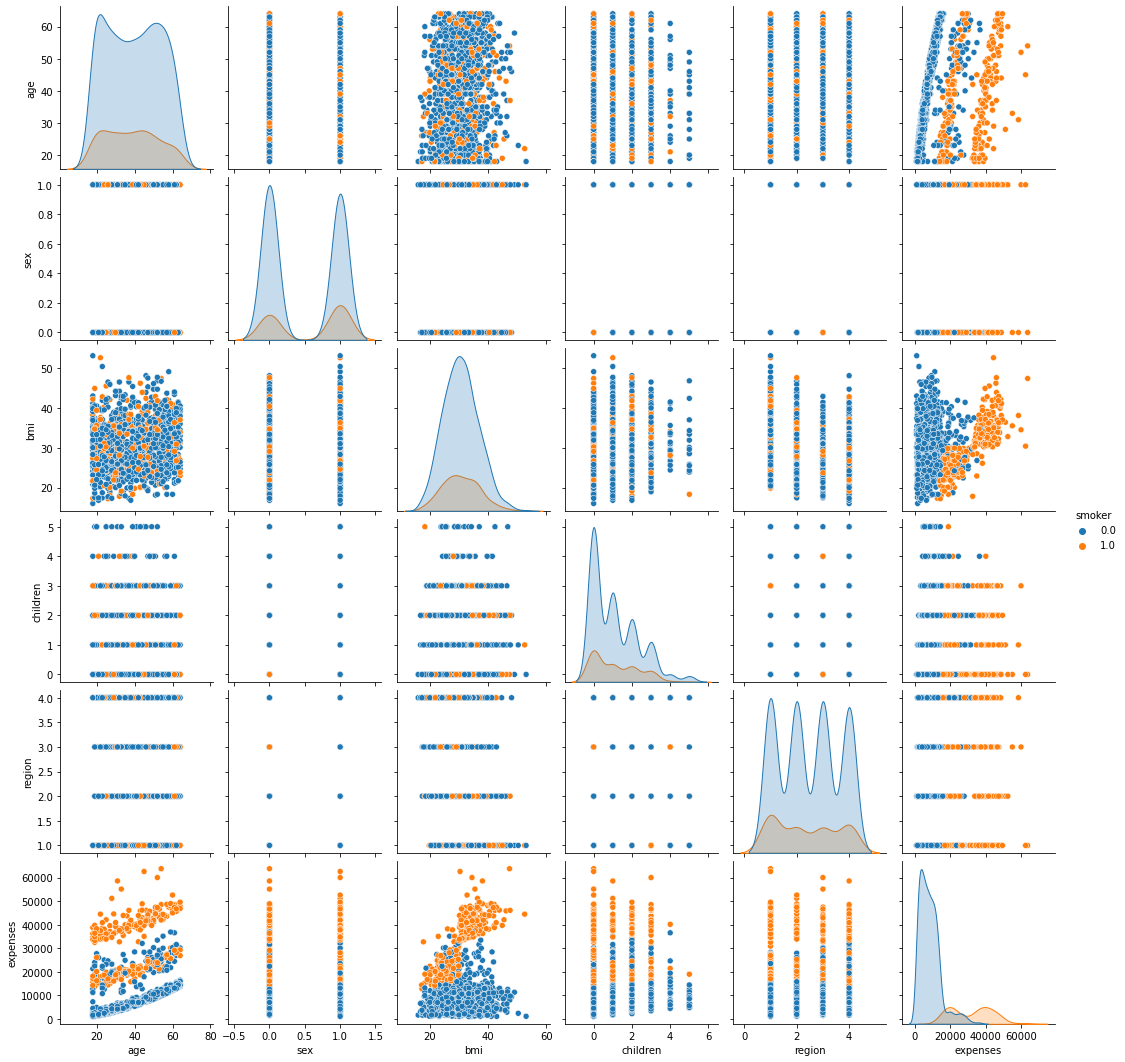

In [601]:
sns.pairplot(data=df1,hue='smoker')

In [602]:
X=df1.drop(['expenses'],axis=1)
Y=df1['expenses']

### One Hot Encoding

In [603]:
# Creating new variables for numerical attributes/columns
num_features = ['age', 'bmi', 'children']
# scaling down numerical features
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('categ', categorical_transformer, categorical_features)])

In [604]:
Y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [605]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: expenses
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [606]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### Building Machine Learning Models and selecting the best fitted

In [607]:
mul_regressors = [
    Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=10))]),
    Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())]),
    Pipeline(steps=[('preprocessor', preprocessor),
                ('xgb', xgb.XGBRegressor())]),
    Pipeline(steps=[('preprocessor', preprocessor),
                        ('extra_tree_regressor', ExtraTreesRegressor())]),
    Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))]),
    Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())]),
    # Pipeline(steps=[('prepocessor', preprocessor), ('Lasso', Lasso())]),
    # Pipeline(steps=[('prepocessor', preprocessor), ('Ridge', Ridge(alpha=1.0))])
]

In [608]:
model_names=['KNeighborsRegression','gradient_boosting','XG Boost','extra_tree_regressor','random_forest_regressor','decision_tree_regressor','Linear_Regressor']

In [609]:
RMSE=[]
R2_score=[]

In [610]:

heading = 8
for model,i in zip( mul_regressors[:heading],model_names):
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_model_train=model.predict(x_train)
    y_pred = model.predict(x_test)
    predict_time = time()-start  
    rmse=sqrt(mean_squared_error(y_test, y_pred))
    R2_Scores=r2_score(y_test, y_pred)
    print(i)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tRoot Mean square error:",i, rmse)
    print("\tR2 score:",R2_Scores)
    print()
    RMSE.append(rmse)
    R2_score.append(R2_Scores)
    

KNeighborsRegression
	Training time: 0.016s
	Prediction time: 0.044s
	Explained variance: 0.784514329512695
	Mean absolute error: 3676.941451492538
	Root Mean square error: KNeighborsRegression 5923.189874700108
	R2 score: 0.7795250018243874

gradient_boosting
	Training time: 0.162s
	Prediction time: 0.016s
	Explained variance: 0.8970565501823261
	Mean absolute error: 2467.532226636046
	Root Mean square error: gradient_boosting 4066.1860019737446
	R2 score: 0.896098331855141

XG Boost
	Training time: 0.170s
	Prediction time: 0.016s
	Explained variance: 0.8455584479606499
	Mean absolute error: 3033.8201426742326
	Root Mean square error: XG Boost 5005.149980037774
	R2 score: 0.8425719087858401

extra_tree_regressor
	Training time: 0.444s
	Prediction time: 0.072s
	Explained variance: 0.8822559779914018
	Mean absolute error: 2347.0899839552244
	Root Mean square error: extra_tree_regressor 4350.2262200924215
	R2 score: 0.8810753938806105

random_forest_regressor
	Training time: 0.264s
	Pred

### Comparing the results of all the ML Models

In [611]:
models = pd.DataFrame({
    'Model' : model_names,
    'RMSE' : RMSE,
    'r2_score' :R2_score
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
4,random_forest_regressor,4028.751601,0.898003
1,gradient_boosting,4066.186002,0.896098
3,extra_tree_regressor,4350.226220,0.881075
5,decision_tree_regressor,4365.623720,0.880232
2,XG Boost,5005.149980,0.842572
6,Linear_Regressor,5641.193519,0.800018
0,KNeighborsRegression,5923.189875,0.779525


In [612]:
gr_test=pd.concat([x_test,y_test],axis=1)


In [613]:
gr_test['Predicted']= mul_regressors[1].predict(x_test)
gr_test.head()

,age,sex,bmi,children,smoker,region,expenses,Predicted
578,52,1.0,30.2,1,0.0,2.0,9724.53,12102.214563
610,47,0.0,29.4,1,0.0,1.0,8547.69,9896.387518
569,48,1.0,40.6,2,1.0,3.0,45702.02,46016.053927
1034,61,1.0,38.4,0,0.0,3.0,12950.07,14638.851393
198,51,0.0,18.1,0,0.0,3.0,9644.25,11062.719043


In [614]:

os.chdir(r"D:\DS Projects\insurance")

In [615]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold 

In [616]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.02,.06,.08,.1], #so called `eta` value
#               'max_depth': [3,5, 9, 11],
#               'min_child_weight': [4,0,9],
#               'n_estimators': [500,1000,2000],}

In [617]:
# xgbr = xgb.XGBRegressor(seed = 20, verbosity=0)
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=parameters,
#                    scoring='neg_mean_squared_error',
#                    cv=5,n_jobs=-1,
#                    verbose=True)
# clf.fit(X, Y)


In [618]:
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [619]:
import pickle

file=open("insurance_pemium_mdl.pkl",'wb')
pickle.dump(mul_regressors[1],file)